In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [4]:
# set graphical parameters
# % matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.dpi'] = 90
sns.set_context('notebook', font_scale=1.05)
sns.set_style('white')

pal = ['#066b2b', '#0a3e78', '#ae1626','#444745','#55a15a', '#5588a1', 'indianred']

In [5]:
wd = '/home/robin/Documents/data-sci/C_Team/sales_forcecasting/' #path if you download the data folder and save in the same location with the notebook


#wd = '/home/robin/Documents/data-sci/C组/销售预测/'

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

train = pd.read_csv(wd + 'ResultDataMonth.csv',  index_col='YearMonth')
# store = pd.read_csv(wd + 'store.csv')
train.head()

FileNotFoundError: [Errno 2] File b'/home/robin/Documents/data-sci/C_Team/sales_forcecasting/ResultDataMonth.csv' does not exist: b'/home/robin/Documents/data-sci/C_Team/sales_forcecasting/ResultDataMonth.csv'

In [16]:
train.dtypes

Region         object
ItemCode        int64
BrandCode       int64
Package        object
ShipQty       float64
SalesQty      float64
Year            int64
Month           int64
Quarter         int64
HolidayDay      int64
dtype: object

In [17]:
train.index # in reverse order (newest data points first)

Index(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10',
       ...
       '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-08', '2017-09', '2017-10', '2017-11'],
      dtype='object', name='YearMonth', length=1580)

In [18]:
train.shape

(1580, 10)

### Analysis of Sales (Target Variable)

* How do sales vary (what does the distribution of sales look like and how is it impacted by the various explanatory features?)

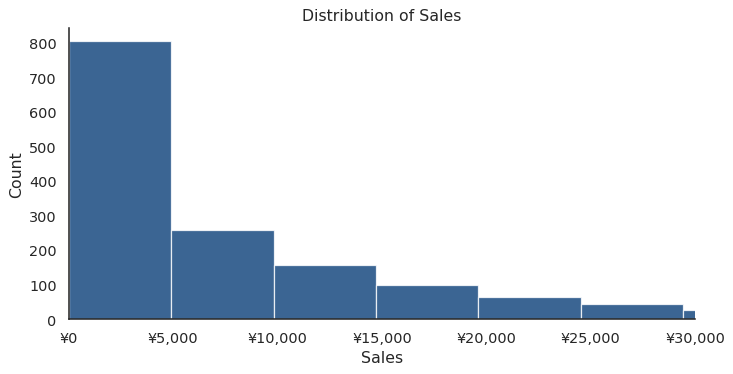

In [42]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.hist(train['SalesQty'], alpha = .8, bins=60, color = pal[1])
ax.set_title('Distribution of Sales')
ax.set_ylabel('Count', fontname = 'Arial')
ax.set_xlabel('Sales', fontname = 'Arial')
ax.set_xlim(0, 30000)

x_vals = ax.get_xticks()
ax.set_xticklabels(['¥{:,.0f}'.format(x) for x in x_vals], fontname = 'Arial')

y_vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_vals])

sns.despine();

* check on the sales of zero on holiday for each brand, is there any finding

In [50]:
train[train['SalesQty']==0].groupby(['HolidayDay','BrandCode'])['SalesQty'].aggregate('count').unstack()

BrandCode,33,34,53,74
HolidayDay,,,,
0,24.0,3.0,4.0,2.0
1,8.0,2.0,2.0,NaN
2,6.0,1.0,1.0,NaN
3,7.0,5.0,NaN,NaN
4,2.0,1.0,1.0,NaN
5,3.0,NaN,NaN,NaN
7,6.0,2.0,2.0,NaN
8,NaN,1.0,1.0,NaN


* for brand code 74, there is no impact 

### Sales by Store, Customer

In [12]:
train['Sales_Per_Customer'] = train['Sales'] / train['Customers']
train['Sales_Per_Customer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: Sales_Per_Customer, dtype: float64

The mean sales per customer is ~$9.50

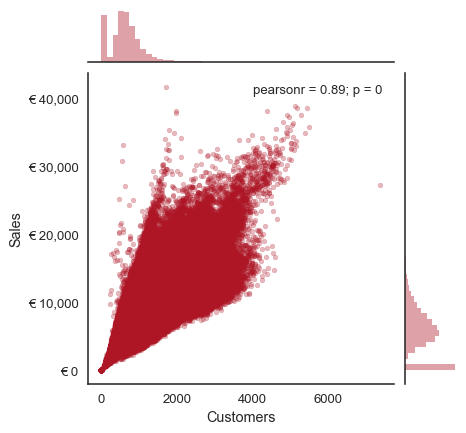

In [13]:
g = sns.jointplot(x = 'Customers', y = 'Sales', data = train, color = pal[2], alpha = 0.3, joint_kws={'s': 15}, size = 5)
y_vals = g.ax_joint.get_yticks()
g.ax_joint.set_yticklabels(['€ {:,.0f}'.format(y) for y in y_vals]);


* Check the variability around customers, sales per customer at the store level.

### Impact of Promotions, Holidays on Sales

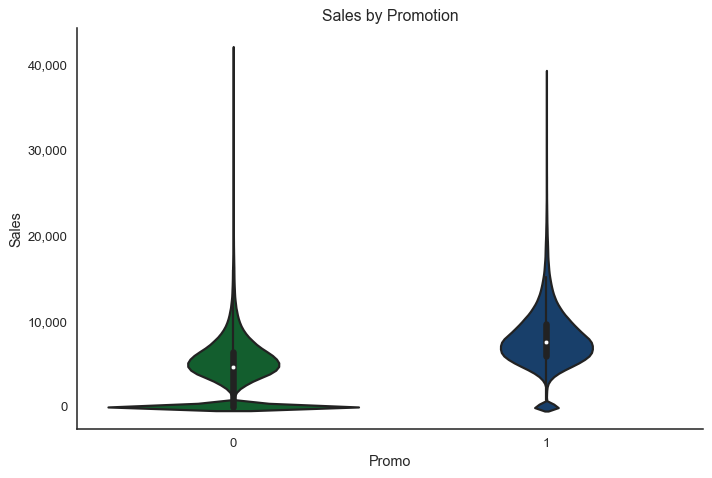

In [14]:
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'Promo', y = 'Sales', data = train, palette = pal)
ax.set_title('Sales by Promotion')
ax.set_xlabel('Promo')
ax.set_ylabel('Sales')

y_vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_vals])

sns.despine();

How does sales per customer change during promotional periods?

In [15]:
train.groupby('Promo')['Sales_Per_Customer'].median()

Promo
0    8.741597
1    9.956947
Name: Sales_Per_Customer, dtype: float64

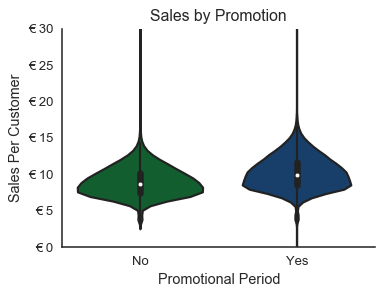

In [16]:
fig, ax = plt.subplots(figsize = (4, 3))
ax = sns.violinplot(x = 'Promo', y = 'Sales_Per_Customer', data = train, palette=pal, alpha = 0.8)
ax.set_title('Sales by Promotion', fontname = 'Arial')
ax.set_xlabel('Promotional Period', fontname = 'Arial')
ax.set_ylabel('Sales Per Customer', fontname = 'Arial')

ax.set_ylim(0, 30)

y_vals = ax.get_yticks()
ax.set_yticklabels(['€ {:,.0f}'.format(y) for y in y_vals], fontname = 'Arial')

x_vals = ax.get_xticks()
ax.set_xticklabels(['No', 'Yes'], fontname = 'Arial')

sns.despine();

As expected, generally higher sales during promotional periods.

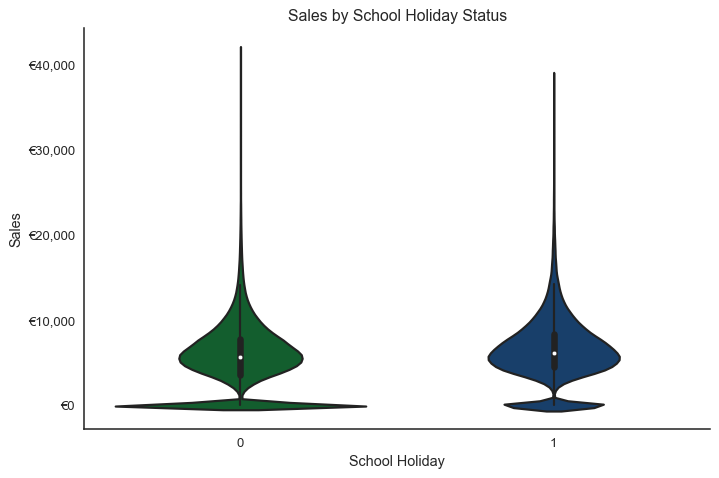

In [17]:
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'SchoolHoliday', y = 'Sales', data = train, palette = pal)
ax.set_title('Sales by School Holiday Status')
ax.set_xlabel('School Holiday')
ax.set_ylabel('Sales')

y_vals = ax.get_yticks()
ax.set_yticklabels(['€{:,.0f}'.format(y) for y in y_vals])

sns.despine();

In [18]:
train['StateHoliday'].value_counts().index

Index(['0', 0, 'a', 'b', 'c'], dtype='object')

In [19]:
# fix zeros on StateHoliday
def zero_str(var):
    if var == 0:
        return('0')
    else:
        return(var)
    
train['StateHoliday'] = train['StateHoliday'].apply(lambda x: zero_str(x))

train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

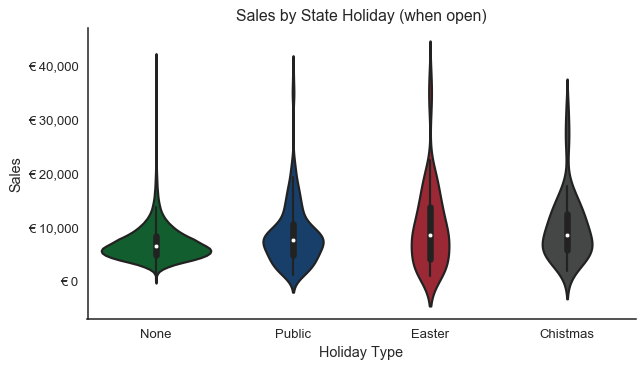

In [20]:
fig, ax = plt.subplots(figsize = (7, 4))
ax = sns.violinplot(x = 'StateHoliday', y = 'Sales', data = train[train['Open']==1], palette = pal)
ax.set_title('Sales by State Holiday (when open)', fontname = 'Arial')
ax.set_xlabel('Holiday Type', fontname = 'Arial')
ax.set_ylabel('Sales', fontname = 'Arial')

hol_list = ['None', 'Public', 'Easter', 'Chistmas']

x_vals = ax.get_xticks()
ax.set_xticks(x_vals)
ax.set_xticklabels(hol_list, fontname = 'Arial')

y_vals = ax.get_yticks()
ax.set_yticklabels(['€ {:,.0f}'.format(y) for y in y_vals], fontname = 'Arial')

sns.despine();

In [21]:
sns.set_context('notebook', font_scale=1.05)

a = public holiday<br></br>
b = Easter holiday<br></br>
c = Christmas<br></br>
0 = None<br></br>


In [22]:
train[train['Open'] == 1].groupby('StateHoliday')['Sales'].median()

StateHoliday
0    6368
a    7556
b    8423
c    8397
Name: Sales, dtype: int64

##### Do people spend more on holidays?

In [1]:
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'StateHoliday', y = 'Sales_Per_Customer', data = train[train['Open']==1],
                   palette = pal)
ax.set_title('Sales Per Customer by State Holiday Status (when open)')
ax.set_xlabel('Holiday Type')
ax.set_ylabel('Sales Per Customer')

hol_list = ['None', 'Public', 'Easter', 'Chistmas']

x_vals = ax.get_xticks()
ax.set_xticks(x_vals)
ax.set_xticklabels(hol_list)

y_vals = ax.get_yticks()
ax.set_yticklabels(['€{:,.0f}'.format(y) for y in y_vals])

sns.despine();

NameError: name 'plt' is not defined

### Sales by Date of Week

In [24]:
train[train['Open']==1].groupby('DayOfWeek')['Sales'].median()

DayOfWeek
1    7539
2    6502
3    6210
4    6246
5    6580
6    5425
7    6876
Name: Sales, dtype: int64

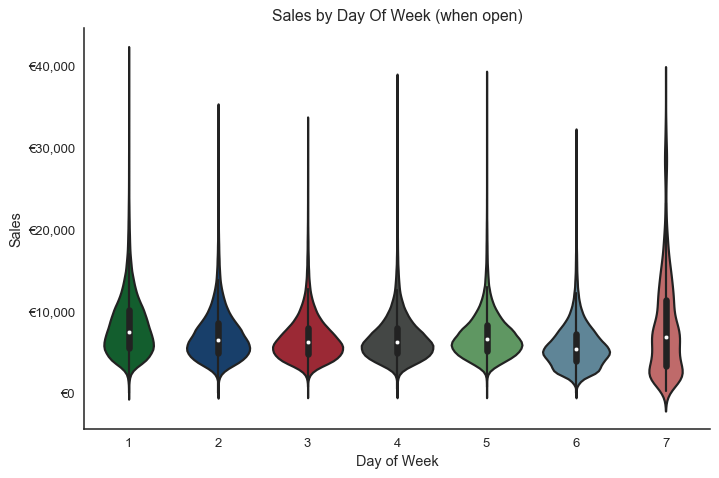

In [25]:
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'DayOfWeek', y = 'Sales', data = train[train['Open']==1], palette = pal)
ax.set_title('Sales by Day Of Week (when open)')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Sales')

y_vals = ax.get_yticks()
ax.set_yticklabels(['€{:,.0f}'.format(y) for y in y_vals])
sns.despine();

### Overall Sales - Downsampling

Group by date and analyze total sales over time

In [26]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Per_Customer
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,8.626118


In [27]:
train_grp = pd.DataFrame(train.groupby('Date')['Sales', 'Customers'].sum())
train_ds = pd.DataFrame(train_grp.resample('W').sum())
train_ds['SalesPerCustomer'] = train_ds.Sales / train_ds.Customers
train_ds['Sales_4RA'] = pd.rolling_mean(train_ds.Sales, window = 4, center=True)
train_ds['Customers_4RA'] = pd.rolling_mean(train_ds.Customers, window = 4, center = True)
train_ds['SpC_4RA'] = pd.rolling_mean(train_ds.SalesPerCustomer, window = 4, center = True)
train_ds.head()

C:\Users\ponle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=True).mean()
  after removing the cwd from sys.path.
C:\Users\ponle\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=True).mean()
  """
C:\Users\ponle\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=True).mean()
  


,Sales,Customers,SalesPerCustomer,Sales_4RA,Customers_4RA,SpC_4RA
Date,,,,,,
2013-01-06,26129335,3110602,8.400089,NaN,NaN,NaN
2013-01-13,49275222,5226350,9.428228,NaN,NaN,NaN
2013-01-20,34377765,4205743,8.174005,38955622.75,4367882.00,8.835828
2013-01-27,46040169,4928833,9.340988,42039796.25,4717144.00,8.869180
2013-02-03,38466029,4507650,8.533499,41971561.50,4717216.25,8.855995


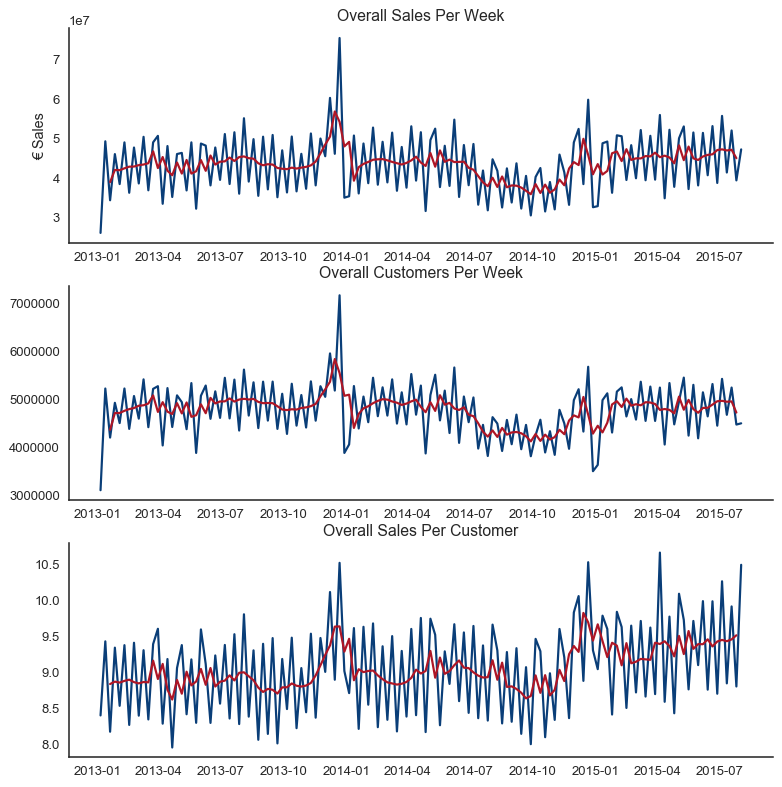

In [28]:
fig, ax = plt.subplots(3, 1, figsize = (9, 10))
ax11, ax21, ax31 = ax.ravel()

ax11.plot(train_ds['Sales'], color = pal[1])
ax11.plot(train_ds['Sales_4RA'], color = pal[2])
ax11.set_title('Overall Sales Per Week' ,fontname = 'Arial')
ax11.set_ylabel('€ Sales', fontname = 'Arial')

ax21.plot(train_ds['Customers'], color = pal[1])
ax21.plot(train_ds['Customers_4RA'], color = pal[2])
ax21.set_title('Overall Customers Per Week')


ax31.plot(train_ds['SalesPerCustomer'], color = pal[1])
ax31.plot(train_ds['SpC_4RA'], color = pal[2])
ax31.set_title('Overall Sales Per Customer')
sns.despine();


## Merging the Store  and Sales Data

In [47]:
#merge the  train.csv and store.csv using the Store column in both text
merged_data = pd.merge(train,store,on="Store")

#set the index to the Date index from train data
merged_data.set_index(train.index,inplace=True)

merged_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Per_Customer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-31,1,4,5020,546,1,1,0,1,9.194139,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-31,1,3,4782,523,1,1,0,1,9.143403,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-31,1,2,5011,560,1,1,0,1,8.948214,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-31,1,1,6102,612,1,1,0,1,9.970588,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


**Store Type by Sales**

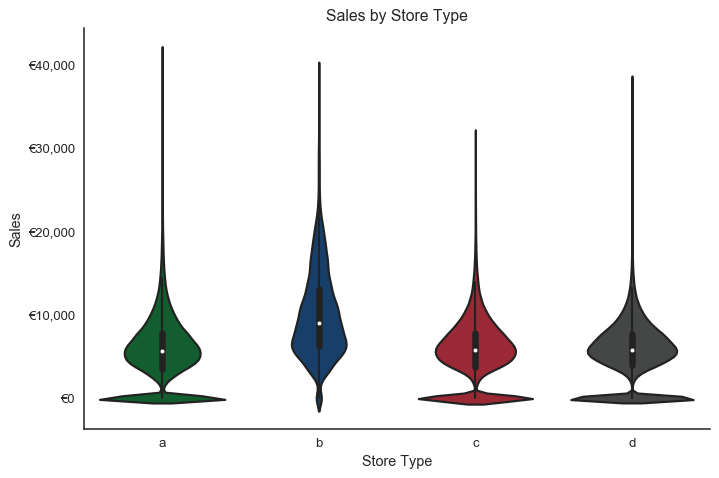

In [48]:
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'StoreType', y = 'Sales',order= ["a","b","c","d"], data = merged_data,palette = pal)
ax.set_title('Sales by Store Type')
ax.set_xlabel('Store Type')
ax.set_ylabel('Sales')

y_vals = ax.get_yticks()
ax.set_yticklabels(['€{:,.0f}'.format(y) for y in y_vals])

sns.despine();

In [49]:
print("Median Sales by store type")
merged_data.groupby("StoreType")["Sales"].median()

Median Sales by store type


StoreType
a    5618.0
b    9025.5
c    5766.0
d    5826.0
Name: Sales, dtype: float64

**Store Type by Customers**

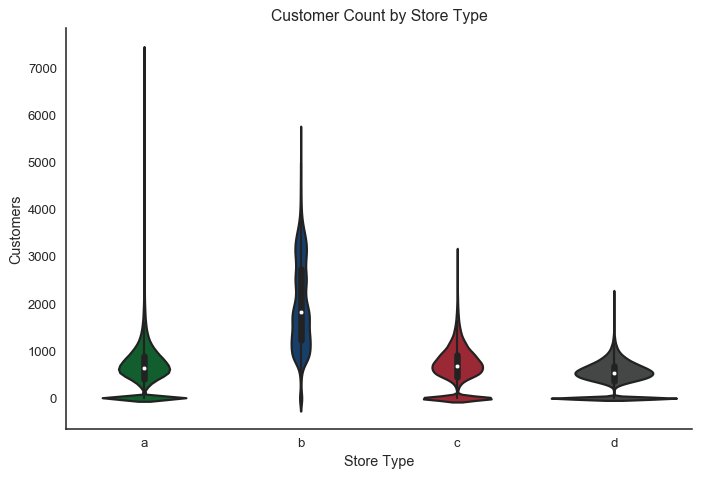

In [51]:
fig, ax = plt.subplots()
ax = sns.violinplot(x = 'StoreType', y = 'Customers',order= ["a","b","c","d"], data = merged_data,palette = pal)
ax.set_title('Customer Count by Store Type')
ax.set_xlabel('Store Type')
ax.set_ylabel('Customers')

y_vals = ax.get_yticks()
#ax.set_yticklabels(['${:,.0f}'.format(y) for y in y_vals])

sns.despine();

In [52]:
print("Median Customers by store type")
merged_data.groupby("StoreType")["Customers"].median()

Median Customers by store type


StoreType
a     647
b    1820
c     682
d     530
Name: Customers, dtype: int64